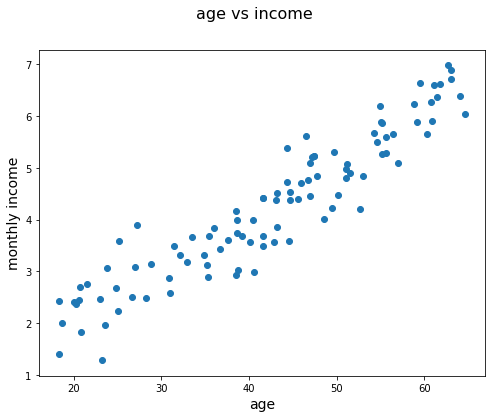

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1]


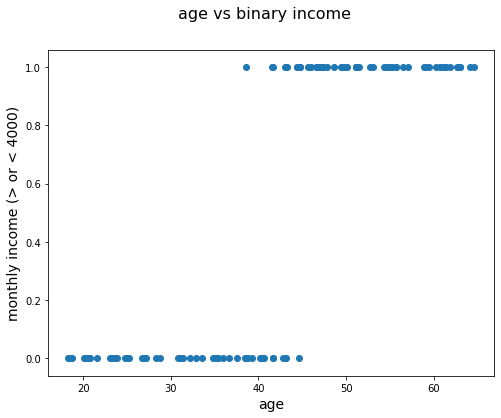

confusion matrix
[[44  3]
 [ 3 50]]
Precision Score
0.9433962264150944
Recall Score
0.9433962264150944


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# import sklearn libryry
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# plot 
np.random.seed(1234)
age = np.random.uniform(18, 65, 100)
income = np.random.normal((age/10), 0.5)
age = age.reshape(-1,1)
fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs income', fontsize=16)
plt.scatter(age, income)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()
# convert binary data
income_bin = income > 4
income_bin = income_bin.astype(int)  
print(income_bin)
# plot Binary data , Classification
fig = plt.figure(figsize=(8, 6))
fig.suptitle('age vs binary income', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income (> or < 4000)', fontsize=14)
plt.show()
# class built for logistic Regression
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.weight = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.weight)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.weight -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.weight)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.weight))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
# fit model
model = LogisticRegression(lr=0.1,num_iter= 300000)
model.fit(age,income_bin)
# predict classed
preds = model.predict(age,0.5)
#Evaluation
(preds == income_bin).mean() 
#output
# 0.93
# fit model sklearn class
# import sklearn libryry
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
    
lg = LogisticRegression()
lg.fit(age,income_bin)
# predict  and  and evaluation
predict_income_bin = lg.predict(age)
# import metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score
print("confusion matrix")
print(confusion_matrix(income_bin,predict_income_bin))
print("Precision Score")
print(precision_score(income_bin,predict_income_bin))
print("Recall Score")
print(recall_score(income_bin,predict_income_bin))
